<a href="https://colab.research.google.com/github/arghac14/ComparativeAnalysis-and-Prediction-of-CropProductions/blob/master/Predictions/Ajmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Jaipur.xlsx to Jaipur (1).xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Jaipur.xlsx']))

In [0]:
df.columns = [''] * len(df.columns)
df.columns = ['Year', 'Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','TGM(Tonnes)','Irrigated_area(hec)','Yield']

In [23]:
df

,Year,Rainfall(mm),Area(hec),Seed_distribution,SRR%,Fertilizer_consumption(kg/hec),TGM(Tonnes),Irrigated_area(hec),Yield
0,2007-08,429.0,140000,62000,44.29,71.18,78,139700,3214
1,2008-09,510.0,137000,52700,38.40,69.74,64,136700,3106
2,2009-10,322.0,132000,43837,33.72,69.73,63,131989,2889
3,2010-11,776.3,158861,57256,36.03,69.32,68,157354,3720
4,2011-12,633.1,148076,52330,35.34,59.86,79,147455,3116
5,2012-13,667.3,151126,51854,34.31,68.67,12,150050,3377
6,2013-14,644.0,152583,63490,41.34,69.32,11,153148,3448
7,2014-15,598.6,157649,68046,43.16,62.30,11,156120,3220
8,2015-16,389.3,150350,44538,29.62,65.20,10,150142,3173
9,2016-17,627.4,157232,47791,30.40,61.77,60,156906,3336


## Showing correlation between dependent and independent variables

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

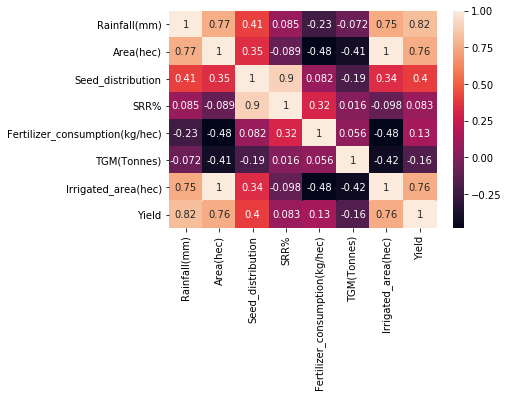

In [25]:
sb.heatmap(df.corr(),annot=True)

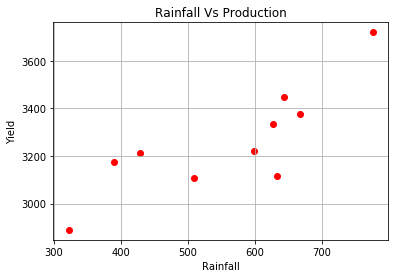

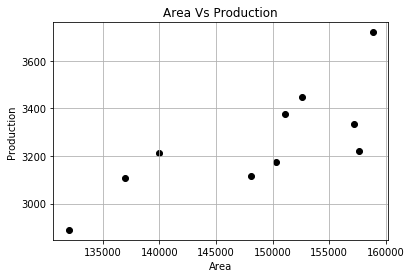

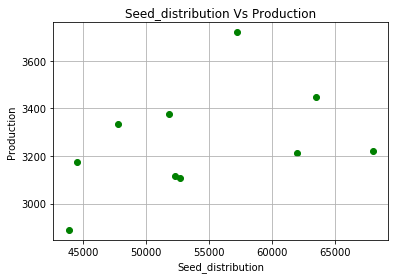

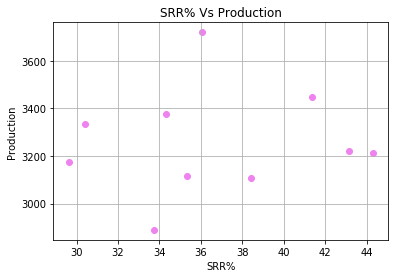

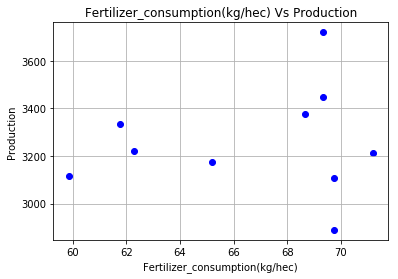

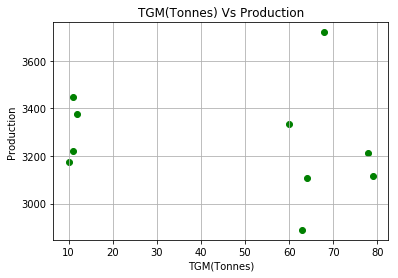

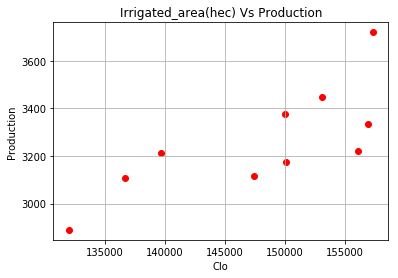

In [26]:
plt.scatter(df['Rainfall(mm)'],df['Yield'],color='red')
plt.title("Rainfall Vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Yield")
plt.grid()
plt.show()
plt.scatter(df['Area(hec)'],df['Yield'],color='black')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

plt.scatter(df['Seed_distribution'],df['Yield'],color='green')
plt.title("Seed_distribution Vs Production")
plt.xlabel("Seed_distribution")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['SRR%'],df['Yield'],color='violet')
plt.title("SRR% Vs Production")
plt.xlabel("SRR%")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Fertilizer_consumption(kg/hec)'],df['Yield'],color='blue')
plt.title("Fertilizer_consumption(kg/hec) Vs Production")
plt.xlabel("Fertilizer_consumption(kg/hec)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['TGM(Tonnes)'],df['Yield'],color='green')
plt.title("TGM(Tonnes) Vs Production")
plt.xlabel("TGM(Tonnes)")
plt.ylabel("Production")
plt.grid()
plt.show()
plt.scatter(df['Irrigated_area(hec)'],df['Yield'],color='red')
plt.title("Irrigated_area(hec) Vs Production")
plt.xlabel("Clo")
plt.ylabel("Production")
plt.grid()
plt.show()


## Multivariate Linear Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [32]:
X = df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']] 
Y = df['Yield']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')



Predicted Production: [2851.32824713 3474.69312735] 


Coefficients:  [ 7.70104015e-01  2.82087005e-02 -1.69510733e-01  2.52439361e+02
  2.72807106e+01  5.62632644e-02] 


R-squared score:  0.7932531113289395 




## Regression (Predicting Production for each District without taking that District as training data) :


In [38]:
error=[]
n=len(df['Yield'])
for i in range(n):
  A_test=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].iloc[df.index==i]
  b_test=df.iloc[df.index==i]['Yield']
  A_train=df[['Rainfall(mm)', 'Area(hec)' , 'Seed_distribution' ,'SRR%', 'Fertilizer_consumption(kg/hec)','Irrigated_area(hec)']].drop([i],axis=0)
  b_train=df.drop([i])['Yield']

  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  print('~ District:',df.at[i,'Year'],'-\n','Predicted Production:',b_pred,', ','Actual Production:',[df.loc[i,'Yield']],', ','Error: ',b_pred-df.loc[i,'Yield'])
  error.append(float(b_pred-df.loc[i,'Yield']))
  

~ District: 2007-08 -
 Predicted Production: [3101.08157969] ,  Actual Production: [3214] ,  Error:  [-112.91842031]
~ District: 2008-09 -
 Predicted Production: [3111.90552889] ,  Actual Production: [3106] ,  Error:  [5.90552889]
~ District: 2009-10 -
 Predicted Production: [2906.08871277] ,  Actual Production: [2889] ,  Error:  [17.08871277]
~ District: 2010-11 -
 Predicted Production: [3571.78425449] ,  Actual Production: [3720] ,  Error:  [-148.21574551]
~ District: 2011-12 -
 Predicted Production: [2979.59784778] ,  Actual Production: [3116] ,  Error:  [-136.40215222]
~ District: 2012-13 -
 Predicted Production: [3467.60850643] ,  Actual Production: [3377] ,  Error:  [90.60850643]
~ District: 2013-14 -
 Predicted Production: [3451.36421776] ,  Actual Production: [3448] ,  Error:  [3.36421776]
~ District: 2014-15 -
 Predicted Production: [3462.85077854] ,  Actual Production: [3220] ,  Error:  [242.85077854]
~ District: 2015-16 -
 Predicted Production: [3064.52216951] ,  Actual Prod

**Mean Squared Error:**

In [63]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error/(n))

print("\nMean Squared Error: ",mean_squared_error)

[-112.91842030659882, 5.905528886445609, 17.08871276622085, -148.2157455085944, -136.40215222204824, 90.60850643498452, 3.3642177639430884, 242.85077854283873, -108.47783048648944, 118.5481662798702]

Mean Squared Error:  121.10728749386969
